# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Atifa Fiorenza
- Email: atifafiorenza24@gmail.com
- Id Dicoding: atifafiorenza24

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib
import squarify

from scipy.stats import chi2_contingency,pointbiserialr
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

### Menyiapkan data yang akan diguankan

In [3]:
# Dataset import from Dicoding GitHub Repository
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(url, delimiter=';')

## Data Understanding

In [4]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.shape

(4424, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

* Marital status - The marital status of the student
* Application mode - The method of application used by the student
* Application order - The order in which the student applied (between 0 - first choice; and 9 last choice)
* Course - The course taken by the student
* Daytime/evening attendance - Whether the student attends classes during the day or in the evening
* Previous qualification - The qualification obtained by the student before enrolling in higher education
* Previous qualification (grade) - Grade of previous qualification (between 0 and 200)
* Nationality - The nationality of the student
* Mother's qualification - The qualification of the student's mother
* Father's qualification - The qualification of the student's father
* Mother's occupation - The occupation of the student's mother
* Father's occupation - The occupation of the student's father
* Admission grade - Admission grade (between 0 and 200)
* Displaced - Whether the student is a displaced person (1-yes, 0-no)
* Educational special needs - Whether the student has any special educational needs (1-yes, 0-no)
* Debtor - Whether the student is a debtor (1-yes, 0-no)
* Tuition fees up to date - Whether the student's tuition fees are up to date (1-yes, 0-no)
* Gender - The gender of the student (1-male, 0-female)
* Scholarship holder - Whether the student is a scholarship holder (1-yes, 0-no)
* Age at enrollment - The age of the student at the time of enrollment
* International - Whether the student is an international student (1-yes, 0-no)
* Curricular units 1st sem (credited) - The number of curricular units credited by the student in the first semester
* Curricular units 1st sem (enrolled) - The number of curricular units enrolled by the student in the first semester
* Curricular units 1st sem (evaluations) - The number of curricular units evaluated by the student in the first semester
* Curricular units 1st sem (approved) - The number of curricular units approved by the student in the first semester

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


### Missing and Duplicate

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Jumlah data null: ", missing_values)

Jumlah data null:  Series([], dtype: int64)


In [10]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


In [11]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


### Unique Data

In [12]:
print(df.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

### Label Encoding (Bussiness Dataset)

In [13]:
df_eda = df.copy()

In [14]:
# -------------------------------
# 1️⃣ Mapping Dictionaries
# -------------------------------

binary_mapping = {0: 'No', 1: 'Yes'}
marital_map = {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'}
daytime_map =  {0: 'Evening', 1: 'Daytime'}
gender_map =  {0: 'Female', 1: 'Male'}
application_mode_map = {
    1: "1st Phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st Phase - Special Contingent (Azores Island)",
    7: "Holders of Other Higher Courses",
    10: "Ordinance No. 854-B/99",
    15: "International Student (Bachelor)",
    16: "1st phase - Special Contingent (Madeira Island)",
    17: "2nd phase - General Contingent",
    18: "3rd phase - General Contingent",
    26: "Ordinance No. 533-A/99, Item B2 (Different Plan)",
    27: "Ordinance No. 533-A/99, Item B3 (Other Institution)",
    39: "Over 23 Years Old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (Evening Attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (Evening Attendance)"
}

previous_qualification_map = {
    1: "Secondary Education",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    15: "10th Year of Schooling - Not Completed",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)"
}

nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

mothers_qualification_map = fathers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd Year Complementary High School Course",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical - Professional Course",
    25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

mothers_occupation_map = fathers_occupation_map = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(Blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Directors of Administrative and Commercial Services",
    114: "Hotel, Catering, Trade and Other Services Directors",
    121: "Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques",
    122: "Health Professionals",
    123: "Teachers",
    124: "Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations",
    125: "Specialists in Information and Communication Technologies (ICT)",
    131: "Intermediate Level Science and Engineering Technicians and Professions",
    132: "Technicians and Professionals, of Intermediate Level of Health",
    134: "Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services",
    135: "Information and Communication Technology Technicians",
    141: "Office Workers, Secretaries in General and Data Processing Operators",
    143: "Data, Accounting, Statistical, Financial Services and Registry-Related Operators",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers and the Like",
    154: "Protection and Security Services Personnel",
    161: "Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers",
    163: "Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence",
    171: "Skilled Construction Workers and the Like, Except Electricians",
    172: "Skilled Workers in Metallurgy, Metalworking and Similar",
    173: "Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like",
    174: "Skilled Workers in Electricity and Electronics",
    175: "Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts",
    181: "Fixed Plant and Machine Operators",
    182: "Assembly Workers",
    183: "Vehicle Drivers and Mobile Equipment Operators",
    191: "Cleaning Workers",
    192: "Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry",
    193: "Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport",
    194: "Meal Preparation Assistants",
    195: "Street Vendors (Except Food) and Street Service Providers"
}

# -------------------------------
# 2️⃣ Mapping otomatis
# -------------------------------

mappings = {
    "Marital_status":marital_map,
    "Daytime_evening_attendance":daytime_map,
    "Gender":gender_map,
    "Application_mode": application_mode_map,
    "Course": course_map,
    "Previous_qualification": previous_qualification_map,
    "Nacionality": nacionality_map,
    "Mothers_qualification": mothers_qualification_map,
    "Fathers_qualification": fathers_qualification_map,
    "Mothers_occupation": mothers_occupation_map,
    "Fathers_occupation": fathers_occupation_map,
    "Displaced": binary_mapping,
    "Educational_special_needs": binary_mapping,
    "Debtor": binary_mapping,
    "Tuition_fees_up_to_date":binary_mapping,
    "Scholarship_holder":binary_mapping,
    "International":binary_mapping
}

for col, mapping in mappings.items():
    df_eda[col] = df_eda[col].map(mapping)

In [15]:
# Cek hasil
df_eda.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [16]:
for feature in df_eda.select_dtypes(include='object'):
    print(feature)
    print(df_eda[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

In [17]:
# Dataset for Business Dashboard
df_eda.to_csv('student_data_cleaned.csv', index=False)

In [18]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

### Univariate Analysis
Univariate analysis is focusing on one variable at a time. The main goal is to describe, summarize, and find patterns in the data. At this stage, the data will be shown using a **histogram** to visualize the distribution and a **boxplot** to identify potential outliers and understand the spread of the data.

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())

Numeric columns: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


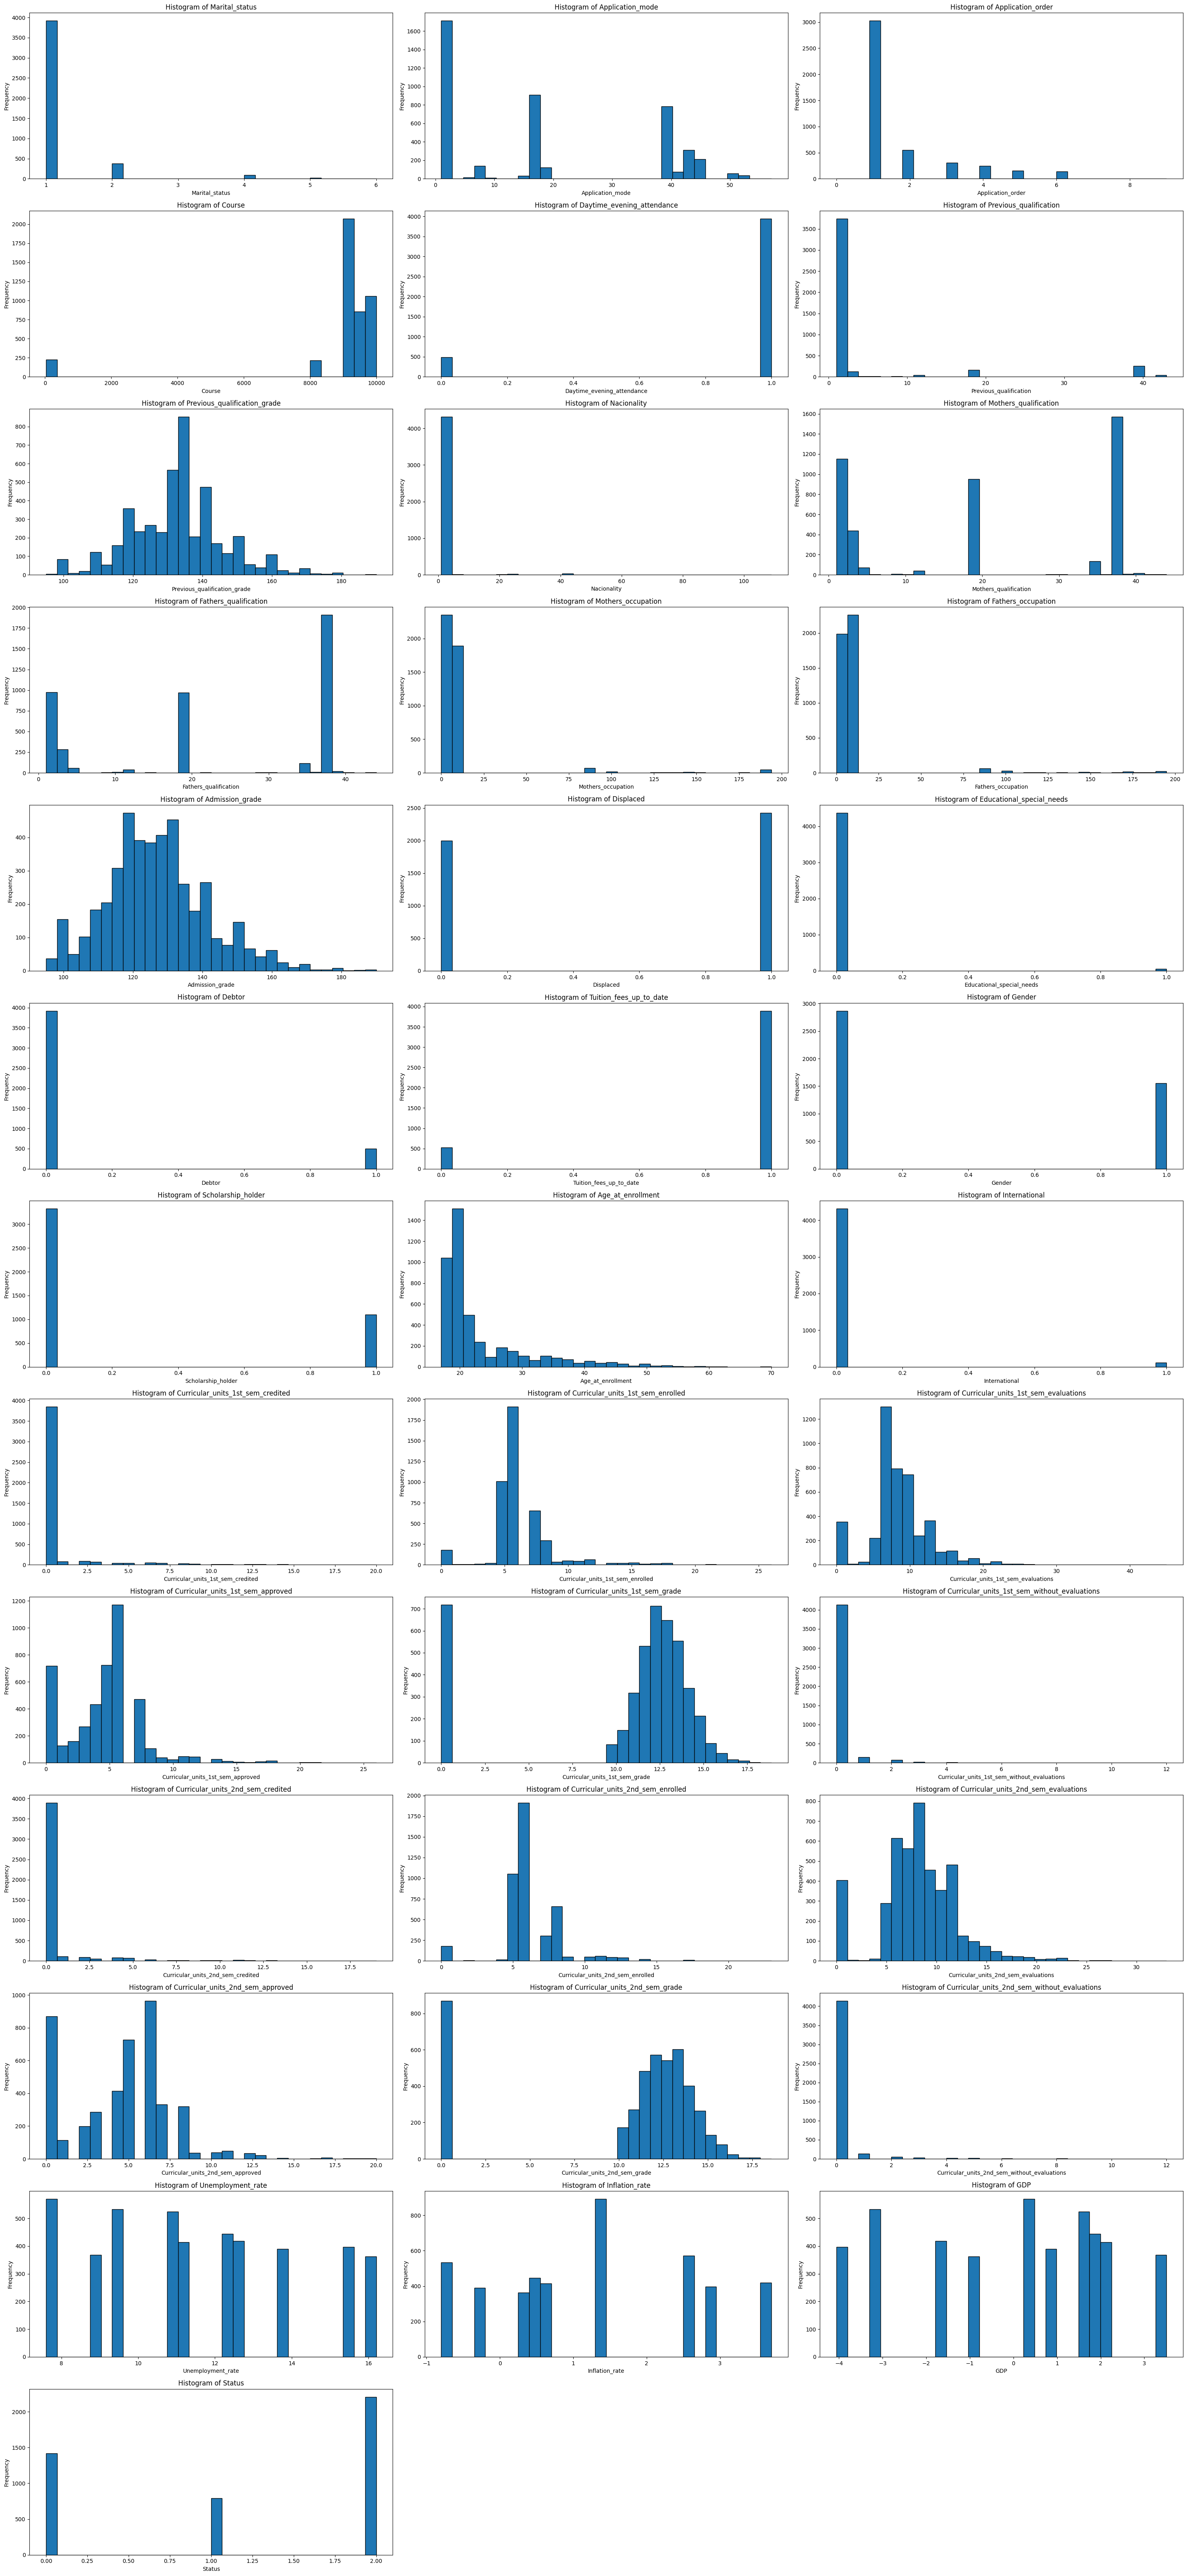

In [20]:
# tentukan jumlah baris & kolom grid
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 5*n_rows))
axes = axes.flatten()  # jadi 1D array biar gampang di-loop

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# hapus subplot kosong kalau kolom numerik tidak habis dibagi rata
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Highly Unbalanced Dataset: The dataset is highly unbalanced for many categorical features, especially for social status, gender, scholarships, and special needs.

* Young, Local Students: The majority of students are young, local, have parents with low education, and are enrolled in popular courses.

* Normal Academic Distribution: The academic distribution (grades, credits, evaluations) tends to be normal, which allows for regression analysis or academic performance prediction.

* Relevant Macroeconomic Features: The macroeconomic features are varied and may be relevant for external analysis of student success.

* Sparse Features: Some features are very rare (outliers or minor categories), which could be a challenge for modeling.

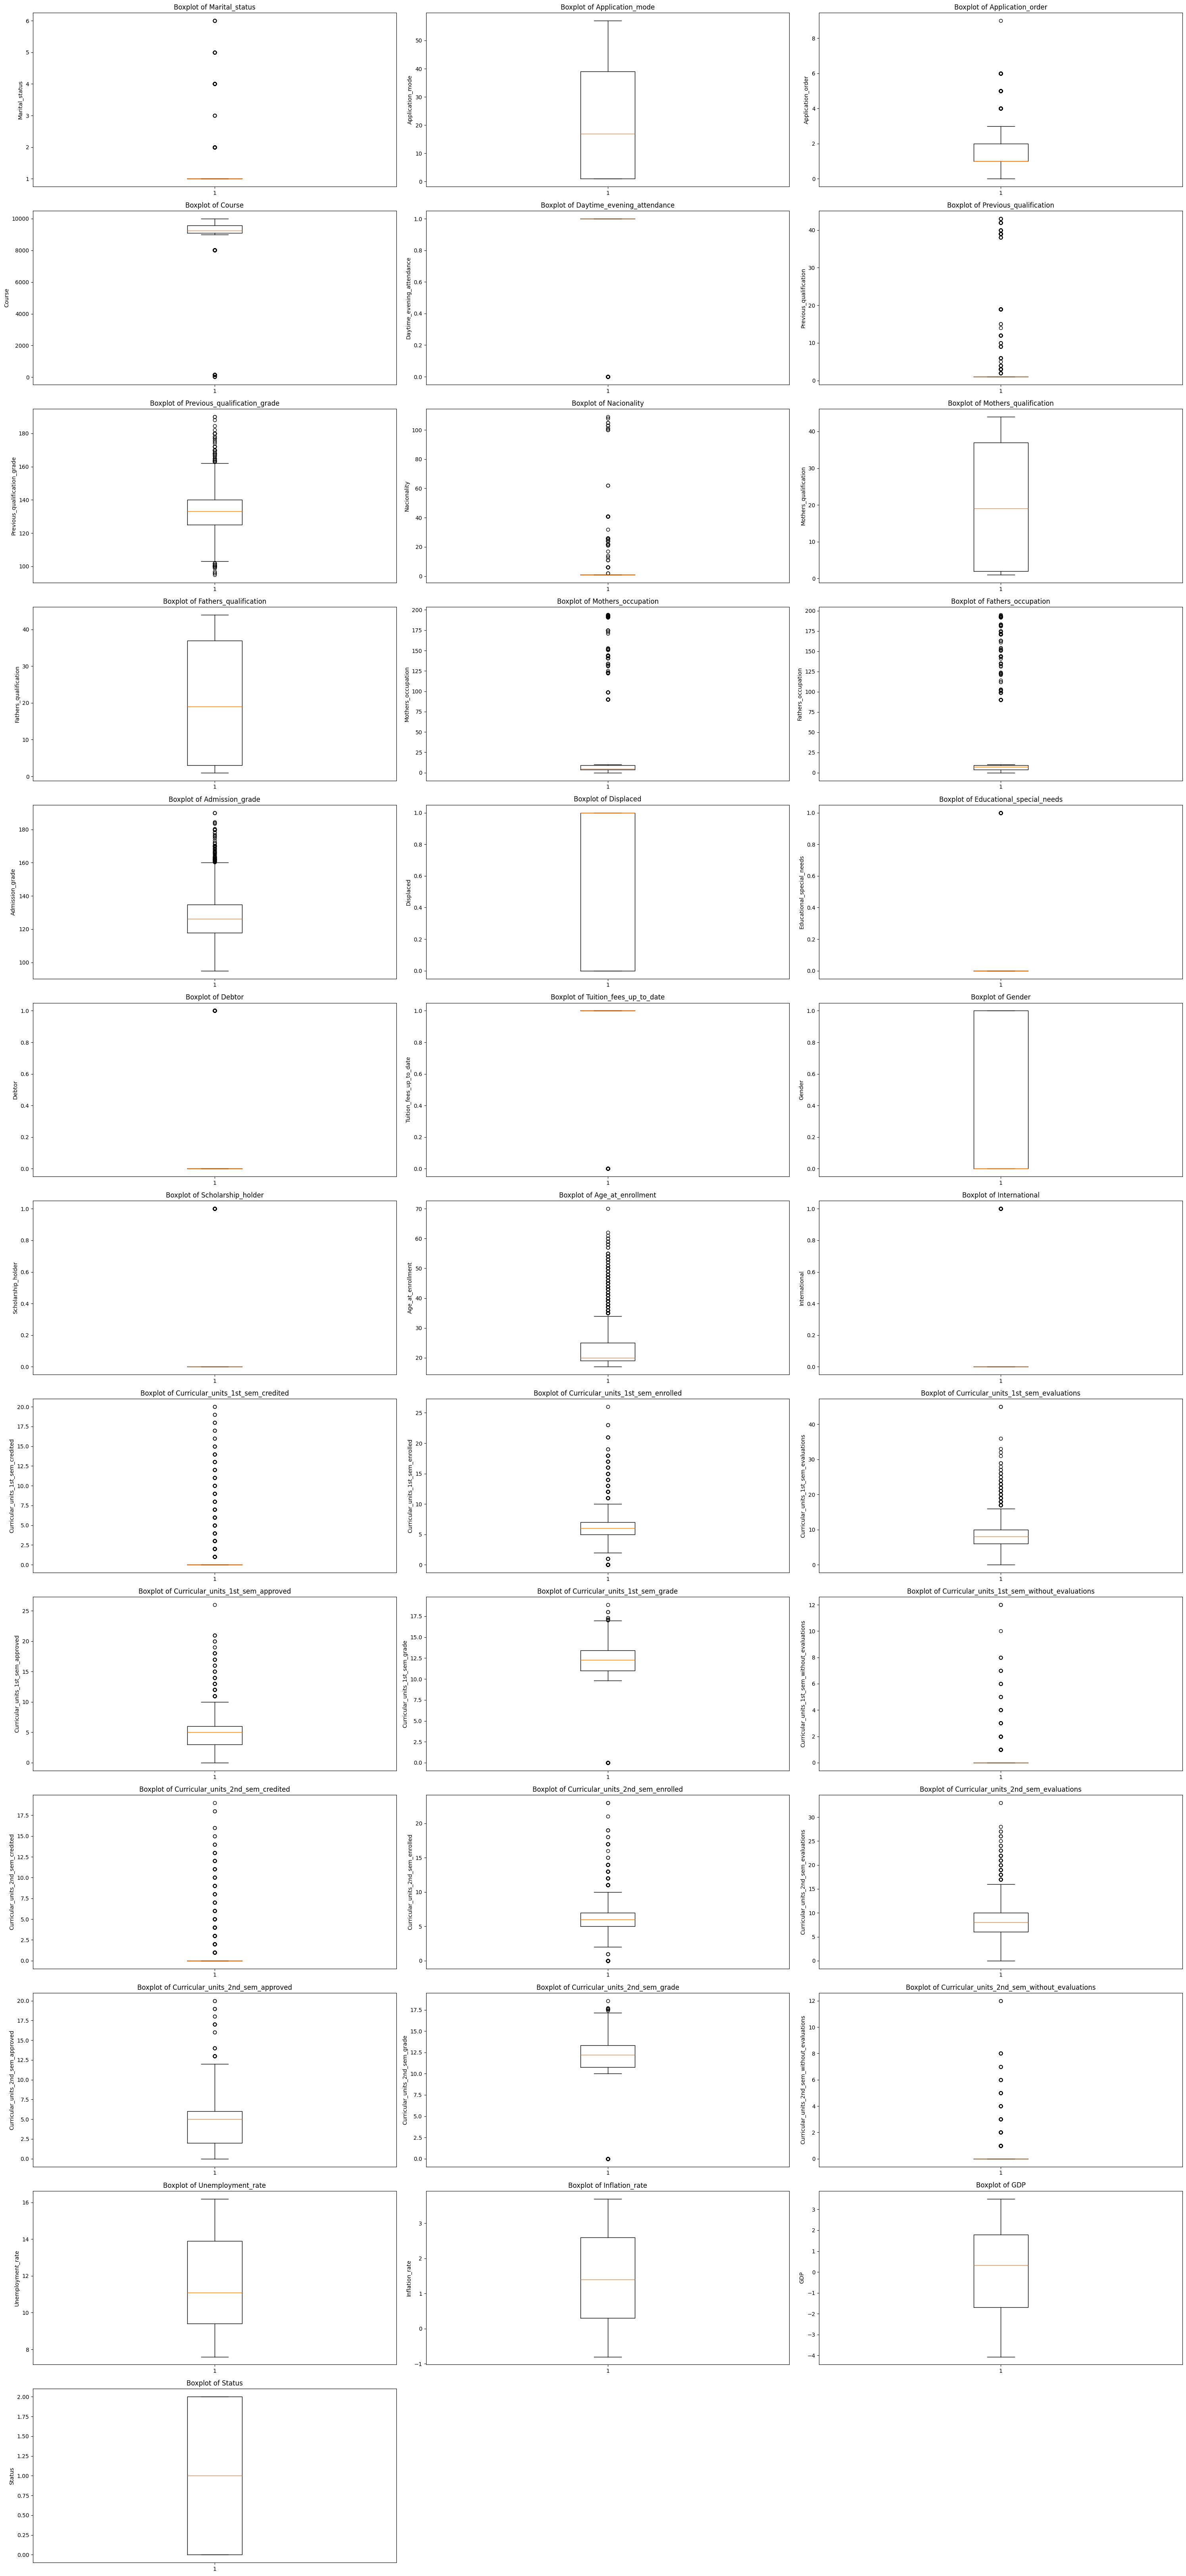

In [21]:
# grid: 3 kolom per baris
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# hapus subplot kosong kalau ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Uneven Distribution: Many numerical variables have high outliers, with some distributions being skewed to the right.

* Binary/Categorical Variables: Almost all values are concentrated in one dominant category.

* Outlier Handling Needed: Techniques like log transformation or winsorizing are required for further statistical analysis.

* Socio-economic Variables Show Disparity: There are extreme values for parents' education/occupation.

* Data is Concentrated in the Mid-Range: The majority of the data is concentrated in the middle range, but outliers can significantly affect the average.

### Multivariate Analysis
Multivariate analysis examines the relationships between three or more variables simultaneously. At this stage, the data will be shown using a **heatmap** to visualize the correlation matrix and a **scatterplot** to show the distribution of multiple features with respect to the target variable quality.

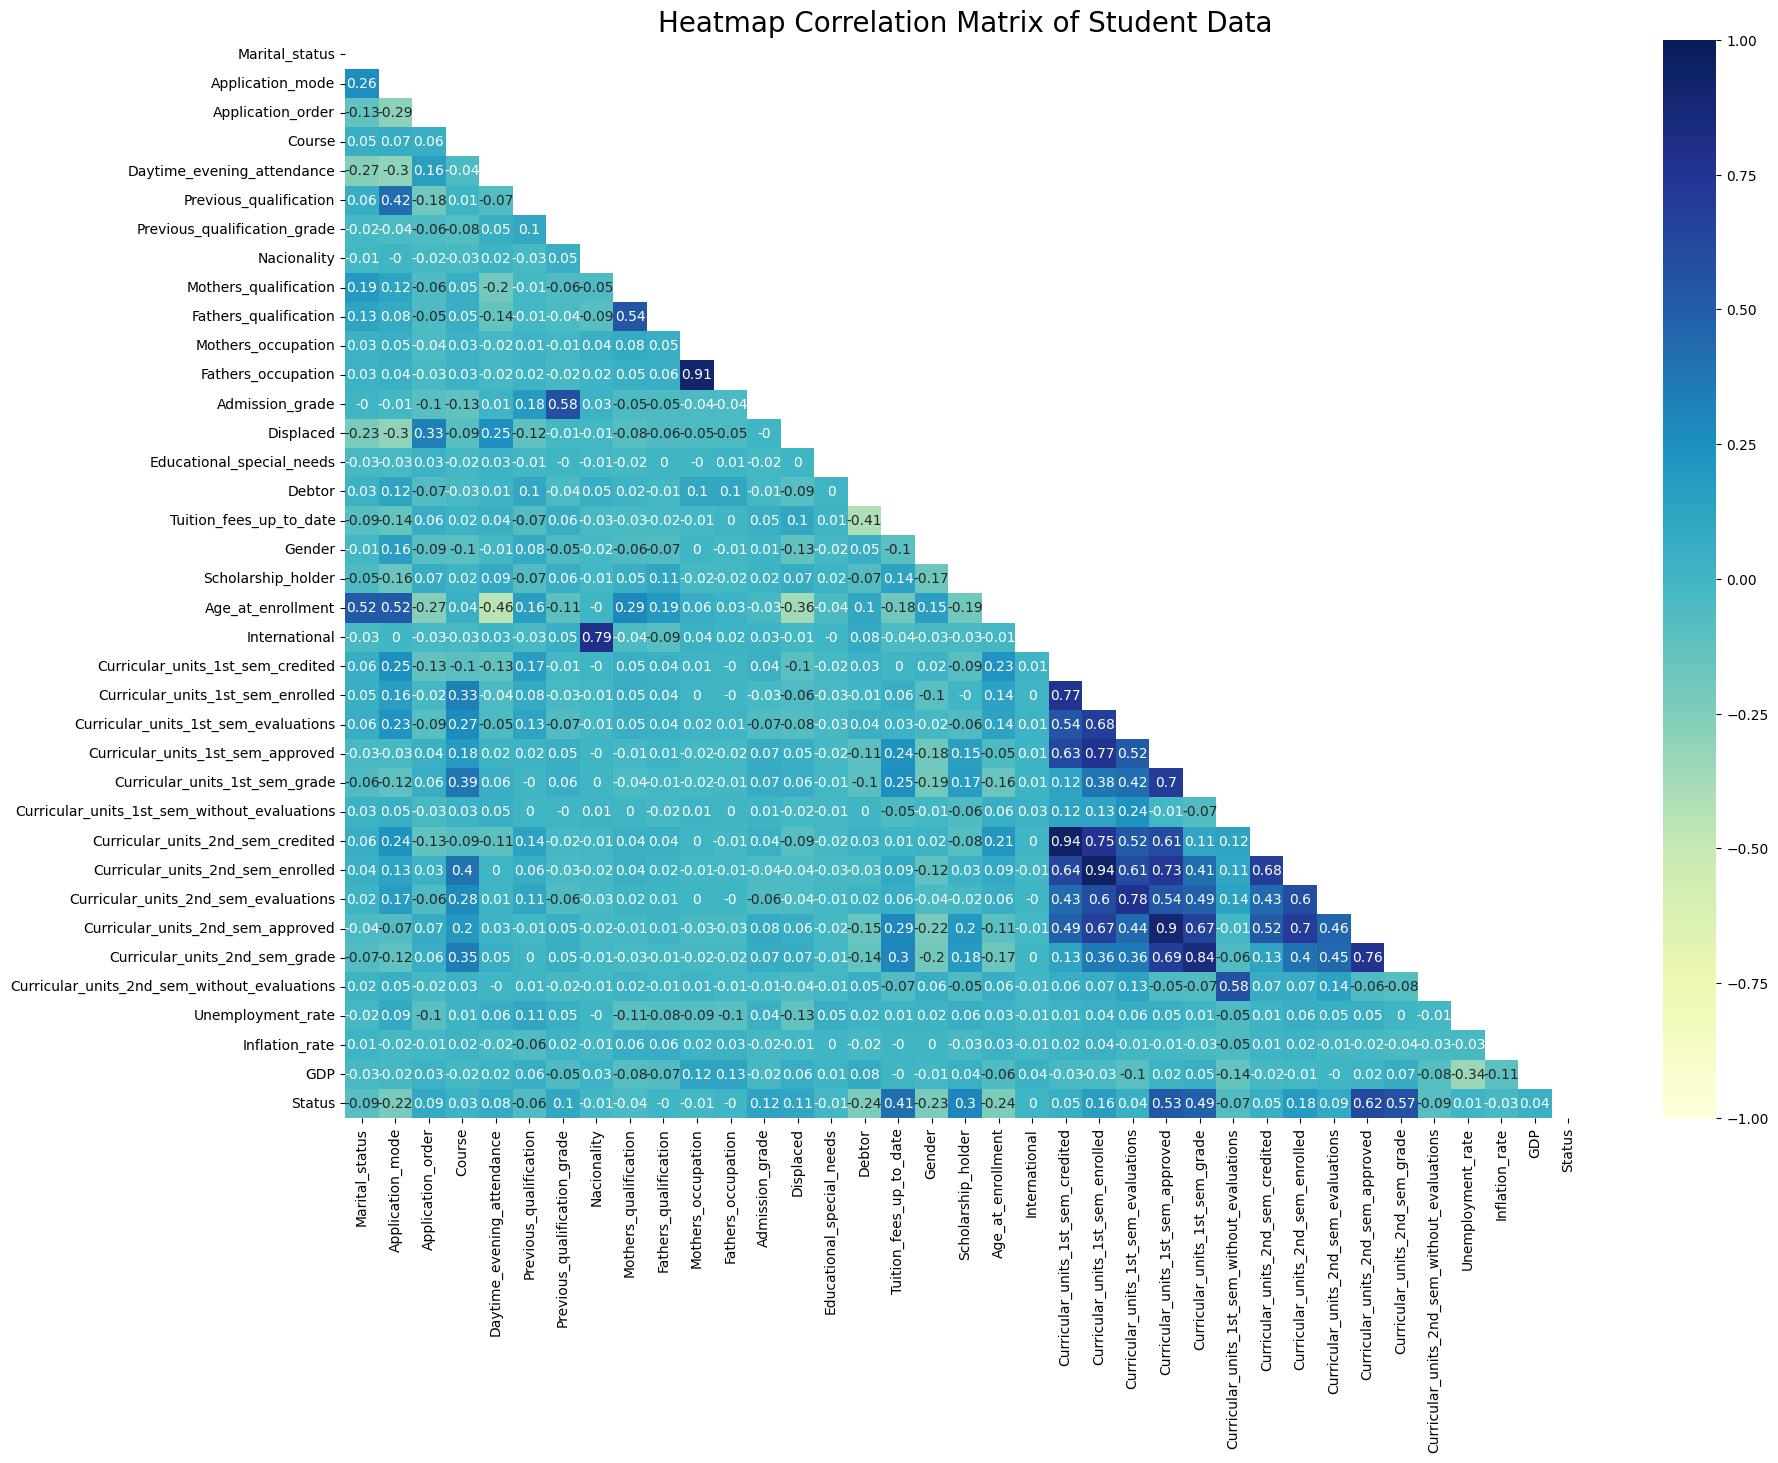

In [22]:
plt.figure(figsize=(20, 14))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlGnBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()

Based on the correlation matrix plot above, some points related to Status are:

* Features that have a **fairly strong** influence on ```Status``` are ```Curricular_units_2nd_sem_approved``` and ```Curricular_units_2nd_sem_grade```.
* Features that have a **moderate** influence on ```Status``` are ```Curricular_units_1nd_sem_approved```, ```Curricular_units_1nd_sem_grade```, ```Tuition_fees_up_to_date```, and ```Scholarship_holder```.
* Features that have a **low** influence on ```Status``` are ```Age_at_enrollment```, ```Debtor```, ```Gender```, and ```Application_mode```.
* And the rest are features that have a very weak influence on ```Status```.

The Relationship Between Predictor Features and the Target Feature

In [23]:
def plot_status_by_multiple_cats(
    df, y_col, cat_cols, ncols=2, figsize=(14,6), orientation="v", text_offset=10
):
    """
    Membuat grid countplot 'Distribution of <y_col> by <cat_col>'
    untuk setiap kolom kategorikal dalam cat_cols.

    Parameters:
    - df: DataFrame
    - y_col: kolom target (string), contoh "Status"
    - cat_cols: list of kolom kategori
    - ncols: jumlah kolom grid
    - figsize: ukuran figure
    - orientation: "v" (vertical, Status di bawah) atau "h" (horizontal, Status di kiri)
    - text_offset: jarak teks dari batang
    """
    nplots = len(cat_cols)
    nrows = (nplots + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(cat_cols):
        ax = axes[i // ncols, i % ncols]

        if orientation == "v":  # Status di bawah
            sns.countplot(
                data=df,
                x=y_col,
                hue=col,
                ax=ax
            )

            for p in ax.patches:
                height = p.get_height()
                if height == 0:
                    continue
                ax.text(
                    p.get_x() + p.get_width()/2,
                    height + text_offset,   # kasih jarak
                    int(height),
                    ha='center'
                )
            ax.set_xlabel(y_col)
            ax.set_ylabel("count")

        else:  # orientation == "h", Status di kiri
            sns.countplot(
                data=df,
                y=y_col,
                hue=col,
                ax=ax
            )

            for p in ax.patches:
                width = p.get_width()
                if width == 0:
                    continue
                ax.text(
                    width + text_offset,   # kasih jarak
                    p.get_y() + p.get_height()/2,
                    int(width),
                    va='center'
                )
            ax.set_xlabel("count")
            ax.set_ylabel(y_col)

        ax.set_title(f"Distribution of {y_col} by {col}")
        ax.legend(title=col)

    # Hilangkan axes kosong kalau jumlah plot < grid size
    for j in range(i+1, nrows*ncols):
        fig.delaxes(axes[j // ncols, j % ncols])

    plt.tight_layout()
    plt.show()

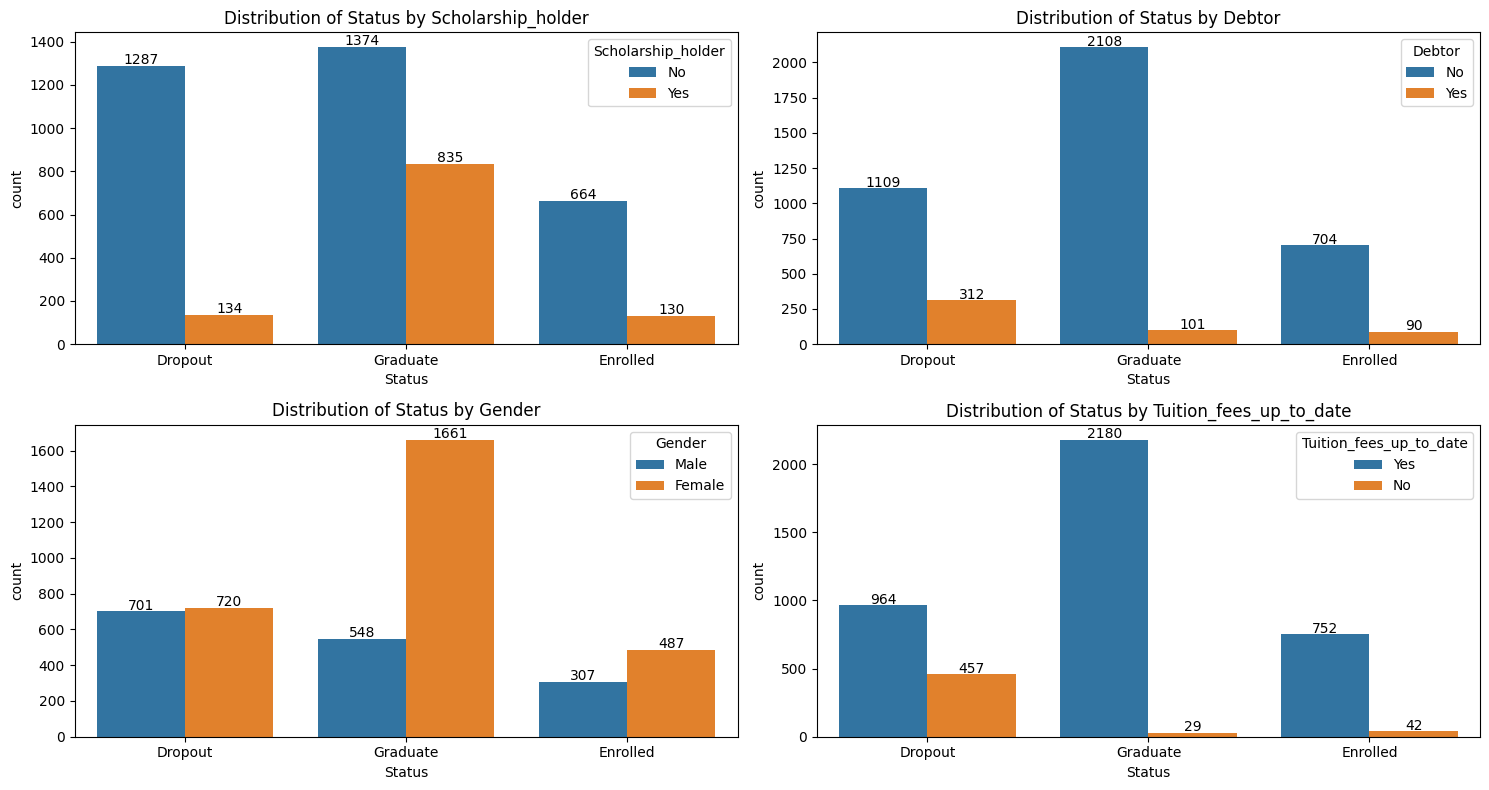

In [24]:
plot_status_by_multiple_cats(
    df_eda,
    y_col="Status",
    cat_cols=["Scholarship_holder", "Debtor","Gender","Tuition_fees_up_to_date"],
    ncols=2,
    figsize=(15,8)
)

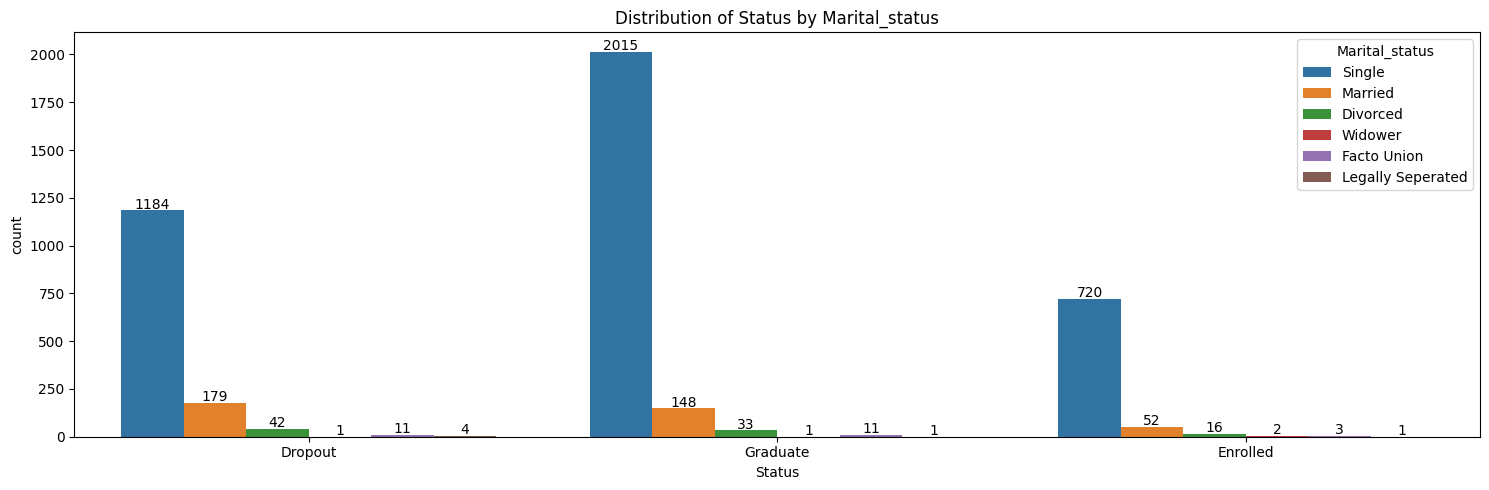

In [25]:
plot_status_by_multiple_cats(
    df_eda,
    y_col="Status",
    cat_cols=["Marital_status"],
    ncols=1,
    figsize=(15,5)
)

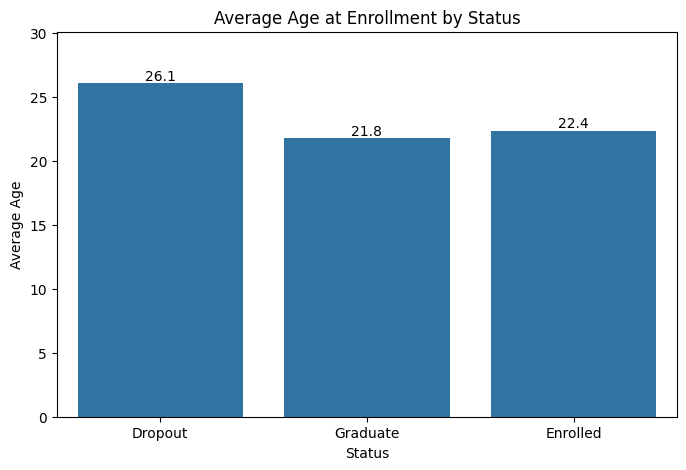

In [26]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_eda, x="Status", y="Age_at_enrollment", errorbar=None)

ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

# Tambahkan angka di atas bar (1 desimal)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posisi x di tengah bar
        height,                        # posisi y di atas bar
        f'{height:.1f}',               # angka rata-rata dengan 1 desimal
        ha='center', va='bottom'
    )

plt.title("Average Age at Enrollment by Status")
plt.ylabel("Average Age")
plt.xlabel("Status")
plt.show()

The older a student is at the time of enrollment, the higher the likelihood of dropping out, whereas students who graduate tend to begin their studies at a younger age.

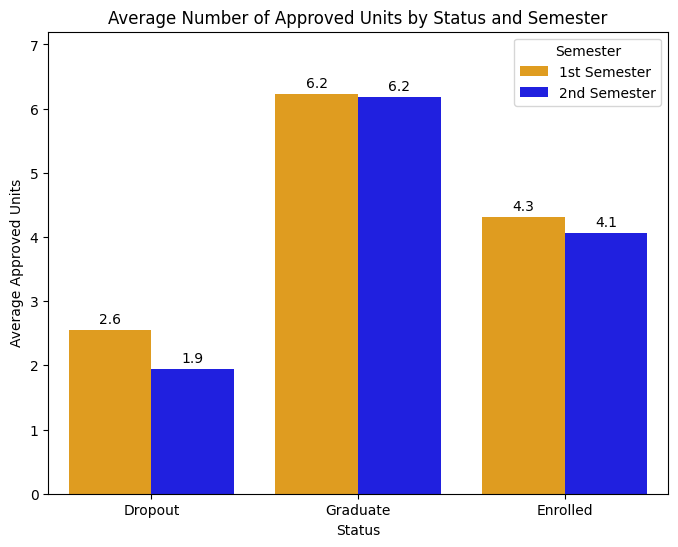

In [27]:
# Misalnya kamu sudah punya dataframe df dengan kolom:
# 'Status', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved'

# Ubah ke long format biar bisa dipakai hue
df_long = df_eda.melt(
    id_vars="Status",
    value_vars=["Curricular_units_1st_sem_approved", "Curricular_units_2nd_sem_approved"],
    var_name="Semester",
    value_name="Approved Units"
)

# Ganti nama semester biar rapi
df_long["Semester"] = df_long["Semester"].map({
    "Curricular_units_1st_sem_approved": "1st Semester",
    "Curricular_units_2nd_sem_approved": "2nd Semester"
})

# Plot grouped barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=df_long,
    x="Status",
    y="Approved Units",
    hue="Semester",
    errorbar=None,
    palette=["orange", "blue"]
)

ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

# Tambahkan nilai rata-rata di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # hanya tampilkan kalau lebih dari 0
        ax.text(
            p.get_x() + p.get_width()/2,
            height + 0.1,
            f"{height:.1f}",
            ha="center",
            fontsize=10
        )

plt.title("Average Number of Approved Units by Status and Semester")
plt.ylabel("Average Approved Units")
plt.show()

Students with **Graduate** status passed more curricular units in both the first and second semesters compared to those who are **Enrolled** or **Dropout**. This indicates that **the more courses a student successfully passes, the greater their likelihood of graduating**, while students with fewer approved units are more likely to drop out.

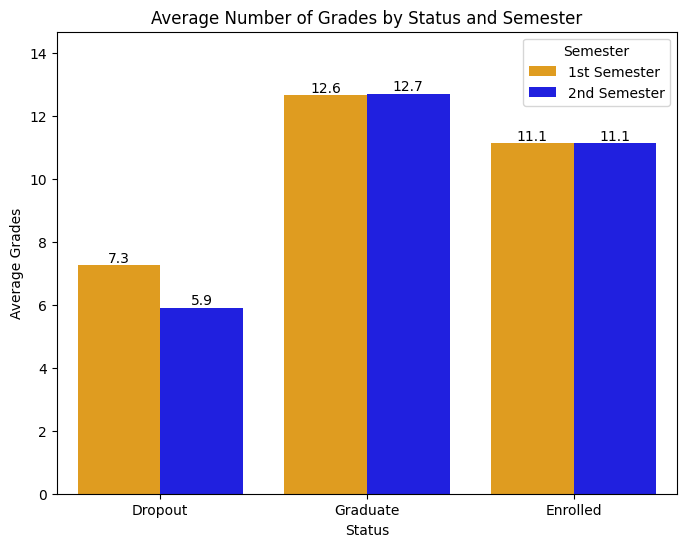

In [28]:
# Misalnya kamu sudah punya dataframe df dengan kolom:
# 'Status', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'

# Ubah ke long format biar bisa dipakai hue
df_long = df_eda.melt(
    id_vars="Status",
    value_vars=["Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade"],
    var_name="Semester",
    value_name="Approved Units"
)

# Ganti nama semester biar rapi
df_long["Semester"] = df_long["Semester"].map({
    "Curricular_units_1st_sem_grade": "1st Semester",
    "Curricular_units_2nd_sem_grade": "2nd Semester"
})

# Plot grouped barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=df_long,
    x="Status",
    y="Approved Units",
    hue="Semester",
    errorbar=None,
    palette=["orange", "blue"]
)

ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

# Tambahkan nilai rata-rata di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # hanya tampilkan kalau lebih dari 0
        ax.text(
            p.get_x() + p.get_width()/2,
            height + 0.1,
            f"{height:.1f}",
            ha="center",
            fontsize=10
        )

plt.title("Average Number of Grades by Status and Semester")
plt.ylabel("Average Grades")
plt.show()

Students with **Graduate** status achieved higher average grades compared to those who are **Enrolled** or **Dropout**. This suggests **that better academic performance, reflected in higher grades, is strongly associated with the likelihood of graduating**, while lower grades increase the risk of dropout.

## Data Preparation / Preprocessing
After doing some analysis, we will do data preparation like removing null values, duplicates, and outliers. We also will normalize the feature to make them have equall weights for the ML models.

### Redundant Feature

In [29]:
subset = [
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Tuition_fees_up_to_date",
    "Scholarship_holder",
    "Age_at_enrollment",
    "Debtor",
    "Gender",
    "Application_mode"
]

# 1️⃣ Matrix korelasi antar fitur
corr_matrix = df[subset].corr().abs()

# 2️⃣ Ambil pasangan fitur dengan korelasi > 0.8
high_corr_list = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if corr_val > 0.8:
            high_corr_list.append({
                "Feature 1": corr_matrix.columns[i],
                "Feature 2": corr_matrix.columns[j],
                "Correlation": corr_val
            })

high_corr_df = pd.DataFrame(high_corr_list)
print("=== Pasangan fitur berkorelasi tinggi ===")
high_corr_df

=== Pasangan fitur berkorelasi tinggi ===


,Feature 1,Feature 2,Correlation
0,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_approved,0.904002
1,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,0.837170


Kedua pasangan ini sangat berkorelasi tinggi → ada duplikasi informasi.

In [30]:
# 3️⃣ Hitung point-biserial correlation vs target
target_stats = {}
for col in subset:
    valid_data = df[['Status', col]].dropna()
    if len(valid_data) > 0:
        corr, pval = pointbiserialr(valid_data['Status'], valid_data[col])
        target_stats[col] = (corr, pval)

print("=== Korelasi fitur dengan target ===")
for col, (corr, pval) in target_stats.items():
    print(f"{col:35} → correlation: {corr:.3f}, p-value: {pval:.4f}")
print()

=== Korelasi fitur dengan target ===
Curricular_units_1st_sem_approved   → correlation: 0.529, p-value: 0.0000
Curricular_units_1st_sem_grade      → correlation: 0.485, p-value: 0.0000
Curricular_units_2nd_sem_approved   → correlation: 0.624, p-value: 0.0000
Curricular_units_2nd_sem_grade      → correlation: 0.567, p-value: 0.0000
Tuition_fees_up_to_date             → correlation: 0.410, p-value: 0.0000
Scholarship_holder                  → correlation: 0.298, p-value: 0.0000
Age_at_enrollment                   → correlation: -0.243, p-value: 0.0000
Debtor                              → correlation: -0.241, p-value: 0.0000
Gender                              → correlation: -0.229, p-value: 0.0000
Application_mode                    → correlation: -0.222, p-value: 0.0000



Korelasi dengan status :
Semester 2 (approved 0.624, grade 0.567) lebih tinggi dibanding semester 1 (approved 0.529, grade 0.485).
→ Fitur semester 2 lebih prediktif terhadap target.

In [31]:
# 4️⃣ Tentukan fitur yang akan dihapus
to_drop = []
for _, row in high_corr_df.iterrows():
    f1 = row["Feature 1"]
    f2 = row["Feature 2"]
    # Ambil yang korelasi vs target lebih rendah
    if target_stats[f1][0] < target_stats[f2][0]:
        to_drop.append(f1)
    else:
        to_drop.append(f2)

# 5️⃣ Hapus fitur dari dataset
df_reduced = df.drop(columns=to_drop)

print("Fitur dihapus karena multikorelasi tinggi:", to_drop)
print("Sisa fitur:", df_reduced.columns.tolist())

Fitur dihapus karena multikorelasi tinggi: ['Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade']
Sisa fitur: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP

### Combine or recode a Status

In [32]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [33]:
df_reduced = df_reduced[df_reduced['Status'] != 1]
df_reduced = df_reduced.reset_index(drop=True)

df_reduced.loc[:, 'Status'] = df_reduced['Status'].replace({2: 1})

In [34]:
df_reduced['Status'].value_counts()

,count
Status,
1,2209
0,1421


In [35]:
# Dataset for testing
df_reduced.to_csv('student_data_reduced.csv', index=False)

In [36]:
df_reduced.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Status']

In this dataset, the label feature used is Status, whether the student is a Graduate or Dropout

### Split Data

In [37]:
X = df_reduced.drop(columns=['Status'])  # semua fitur tersisa
y = df_reduced['Status']                  # target

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
print(y.value_counts())

Status
1    2209
0    1421
Name: count, dtype: int64


In [40]:
# 2. Apply SMOTE to the training set cause imbalanced data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [41]:
print(y_balanced.value_counts())

Status
1    1767
0    1767
Name: count, dtype: int64


In [42]:
# 3. Scaling the training and testing sets
scaler = StandardScaler()

# Fit the scaler on the balanced training data
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Transform the testing data using the SAME scaler object
X_test_scaled = scaler.transform(X_test)

## Modeling

In [43]:
# Define the models
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42),
    'SVM': SVC(class_weight='balanced', max_iter=10000, random_state=42),
    'DT': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'GB': GradientBoostingClassifier(random_state=42),
    'RF': RandomForestClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier()
}
# Define the metrics
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

reports = {}
# Loop pakai X_train_scaled/X_test_scaled untuk LR saja
for model_name, model in models.items():
    if model_name in ['LR', 'SVM', 'KNN']:
        model.fit(X_balanced_scaled, y_balanced)
        pred = model.predict(X_test_scaled)
    else:
        model.fit(X_balanced, y_balanced)
        pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [44]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.904959,0.911700,0.934389,0.922905
SVM,0.902204,0.892178,0.954751,0.922404
DT,0.865014,0.890909,0.886878,0.888889
GB,0.902204,0.898925,0.945701,0.921720
RF,0.911846,0.897059,0.966063,0.930283
KNN,0.842975,0.844538,0.909502,0.875817


Based on the evaluation results, **Random Forest** was selected as the best model because it achieved the highest performance across almost all evaluation metrics. Random Forest reached an accuracy of **91.18%**, a recall of **96.6%**, and an F1-score of **93.0%**, indicating that this model is highly effective in correctly identifying students who drop out.

## Evaluation

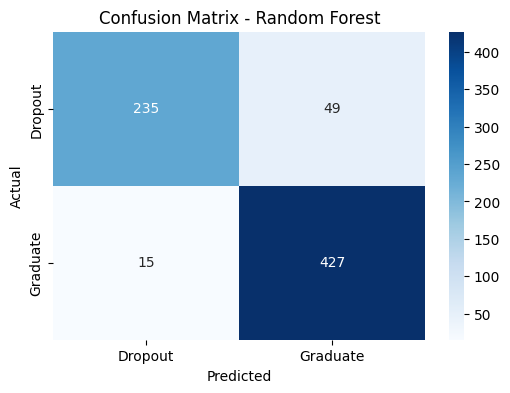

In [45]:
# Prediksi dengan model terbaik (Random Forest)
best_model = models['RF']
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_balanced)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout','Graduate'], yticklabels=['Dropout','Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [46]:
# Classification Report
print("Classification Report Train - Random Forest")
print(classification_report(y_balanced, y_pred_train, target_names=['Dropout','Graduate']))
print("\nClassification Report Test- Random Forest")
print(classification_report(y_test, y_pred, target_names=['Dropout','Graduate']))

Classification Report Train - Random Forest
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1767
    Graduate       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534


Classification Report Test- Random Forest
              precision    recall  f1-score   support

     Dropout       0.94      0.83      0.88       284
    Graduate       0.90      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



In [47]:
joblib.dump(best_model, 'model_rf.joblib')

['model_rf.joblib']

### Inherence

In [48]:
# Buat dataframe hasil prediksi
df_pred = pd.DataFrame({
    'ProbabilityDropOut': y_pred_proba,
    'PredictedStatus': y_pred,
    'TrueStatus': y_test.values
})

df_pred.head()

,ProbabilityDropOut,PredictedStatus,TrueStatus
0,0.57,1,0
1,0.69,1,1
2,0.98,1,1
3,0.98,1,1
4,0.90,1,1
